# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [187]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv"
dataset = pd.read_csv(url)

In [188]:
#Exploring the dataset
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [189]:
dataset.shape

(614, 13)

In [190]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [191]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [192]:
#for better understanding, check how credit history affect the loan status of each applicant
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


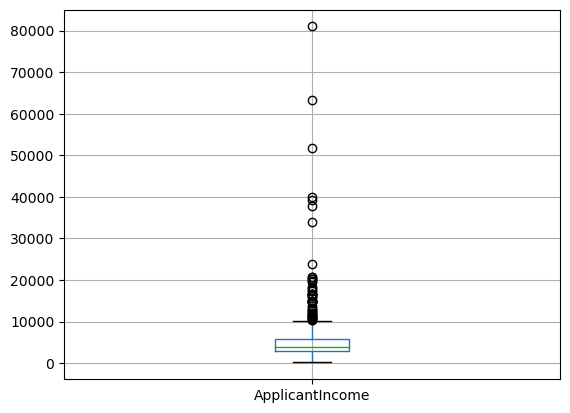

In [193]:
dataset.boxplot(column='ApplicantIncome')
plt.show()                             # from graph you can see the Outliers

In [194]:
# dataset['ApplicantIncome'].hist(bins=20)
# plt.show()

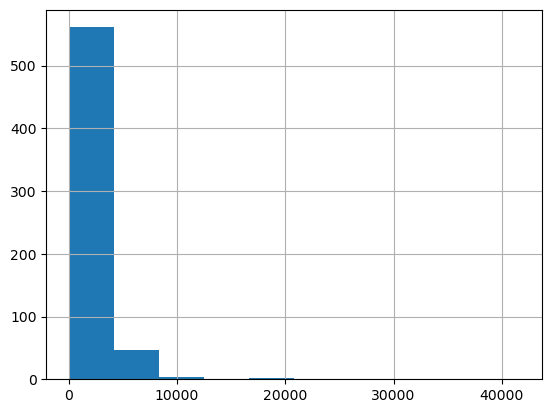

In [195]:
dataset['CoapplicantIncome'].hist(bins=10)
plt.show()

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

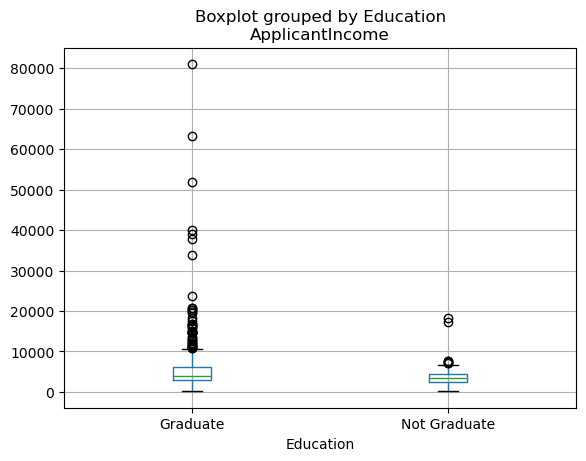

In [196]:
#understand the relation between these columns
dataset.boxplot(column='ApplicantIncome', by= 'Education')

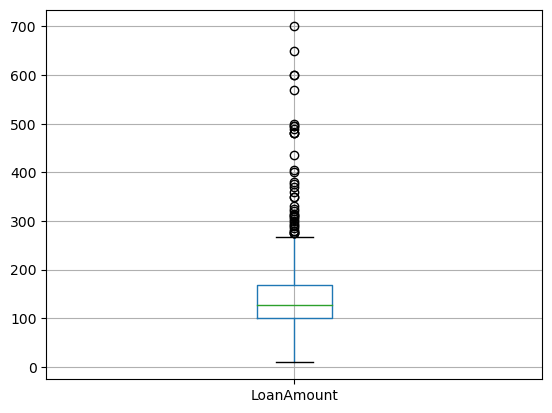

In [197]:
dataset.boxplot(column='LoanAmount')
plt.show()                             # from graph you can see the Outliers

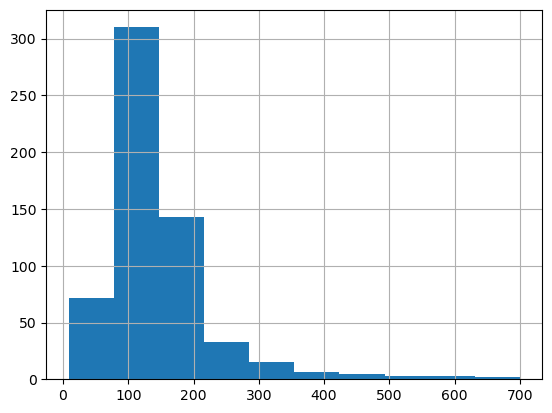

In [198]:
dataset['LoanAmount'].hist(bins=10)
plt.show()

<Axes: >

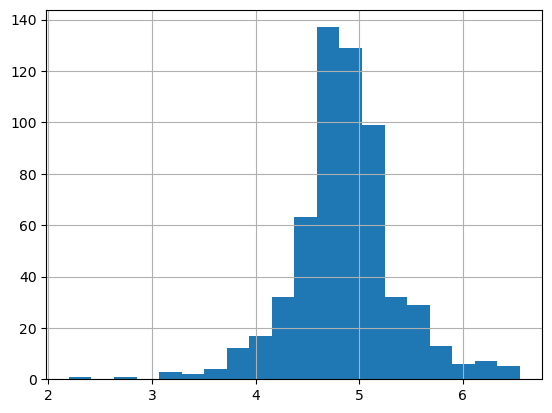

In [199]:
#Applying log function to normalizing "LoanAmount"
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [200]:
#Check missing values in variables in our dataset
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [201]:
# Handling the missing value
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [202]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<Axes: >

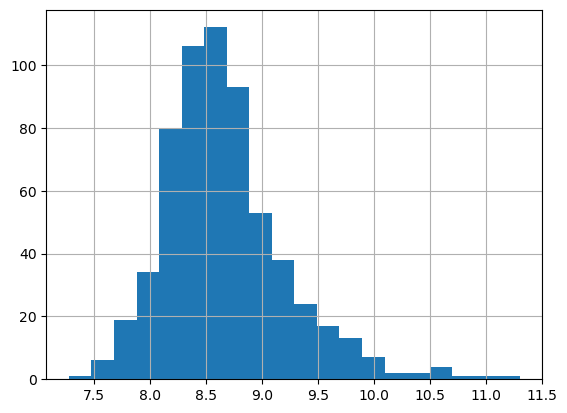

In [203]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

In [204]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [205]:
x = dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y = dataset.iloc[:,12].values
x,y

(array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
        ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
        ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
        ...,
        ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
        ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
        ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
       dtype=object),
 array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
        'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
        'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
        'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',

In [206]:
# Splitting the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [208]:
#perform label encoding 
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
for i in range(0, 5):
    x_train[:,i]= labelencoder_x.fit_transform(x_train[:,i])
    x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [209]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [215]:
labelencoder_y= LabelEncoder()
y_train= labelencoder_y.fit_transform(y_train)

In [216]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [217]:
for i in range(0, 5):
        x_test[:,i]= labelencoder_x.fit_transform(x_test[:,i])
        x_test[:,7]= labelencoder_x.fit_transform(x_test[:,7])

In [218]:
labelencoder_y= LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)

In [222]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [223]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [227]:
#Scale the dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [228]:
#Appling Decition Tree Algorithms
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [230]:
y_pred= DTClassifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [284]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.8292682926829268


In [236]:
#Applying Naive_bayes
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train, y_train)

GaussianNB()

In [239]:
y_pred= NBClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [240]:
from sklearn import metrics
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is:  0.8292682926829268


In [252]:
testdata = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv"
df = pd.read_csv(testdata)

In [253]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [255]:
#Explore test dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [257]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [261]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [262]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

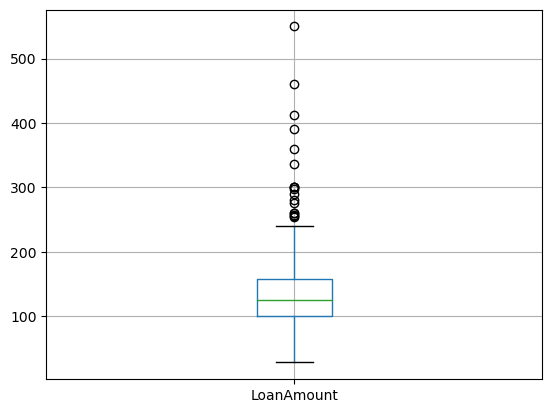

In [263]:
df.boxplot(column= 'LoanAmount')

<Axes: >

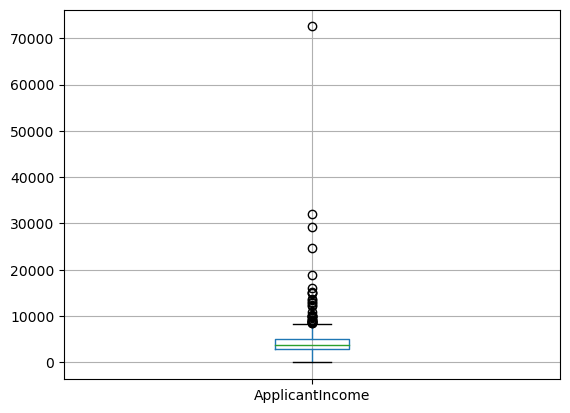

In [264]:
  df.boxplot(column= 'ApplicantIncome')

In [265]:
df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())

In [266]:
df['LoanAmount_log']= np.log(df['LoanAmount'])

In [267]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [269]:
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])

In [270]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [271]:
test= df.iloc[:,np.r_[1:5,9:11,13:15]].values

In [274]:
for i in range(0,5):
    test[:,i]= labelencoder_x.fit_transform(test[:,i])

In [275]:
test[:,7]= labelencoder_x.fit_transform(test[:,7])
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [276]:
test= ss.fit_transform(test)

In [278]:
pred = NBClassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [281]:
#apply LogisticRegression
from sklearn.linear_model import LogisticRegression
LogisticClassifier = LogisticRegression(random_state=0)
LogisticClassifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [283]:
y_pred = LogisticClassifier.predict(x_test)
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [285]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.8292682926829268


In [286]:
from sklearn.svm import SVC
from sklearn import metrics
SVMClassifier = SVC(kernel='linear', random_state=0)
SVMClassifier.fit(x_train, y_train)

y_pred_svm = SVMClassifier.predict(x_test)
print(y_pred_svm)

accuracy_svm = metrics.accuracy_score(y_pred_svm, y_test)
print('The accuracy of SVM is: ', accuracy_svm)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
The accuracy of SVM is:  0.8292682926829268


In [287]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_knn = KNNClassifier.predict(x_test)
print(y_pred_knn)

accuracy_knn = metrics.accuracy_score(y_pred_knn, y_test)
print('The accuracy of KNN is: ', accuracy_knn)

[1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 0 1]
The accuracy of KNN is:  0.7886178861788617


In [288]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_estimators=100, random_state=0)
RFClassifier.fit(x_train, y_train)

y_pred_rf = RFClassifier.predict(x_test)
print(y_pred_rf)

accuracy_rf = metrics.accuracy_score(y_pred_rf, y_test)
print('The accuracy of Random Forest is: ', accuracy_rf)

[0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 0 0 1]
The accuracy of Random Forest is:  0.7642276422764228


In [303]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
X = data.drop('target_column', axis=1)  # Features
y = data['target_column']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['target_column'] not found in axis"

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

In [304]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB


# decision_tree_model = DecisionTreeClassifier()
# svm_model = SVC()
# knn_model = KNeighborsClassifier()
# logistic_model = LogisticRegression()
# naive_bayes_model = GaussianNB()
# random_forest_model = RandomForestClassifier()
# random_forest_model = RandomForestClassifier(max_depth=10)

# models = {
#     'Logistic Regression': logistic_model,
#     'Random Forest': random_forest_model
#     'Decision Tree': decision_tree_model,
#     'Support Vector Machine': svm_model,
#     'K-Nearest Neighbors': knn_model,
#     'Naive Bayes': naive_bayes_model,
# }


SyntaxError: invalid decimal literal (2397249596.py, line 9)

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf


logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
random_forest_model_with_depth = RandomForestClassifier(max_depth=10)
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()

models = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model,
    'Random Forest (Max Depth 10)': random_forest_model_with_depth,
    'Decision Tree': decision_tree_model,
    'Support Vector Machine': svm_model,
    'K-Nearest Neighbors': knn_model,
    'Naive Bayes': naive_bayes_model,
}

ModuleNotFoundError: No module named 'tensorflow'

In [291]:
# Create a parameter grid with the hyperparameters you want to search over
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],          
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

y_pred_best = best_rf_model.predict(x_test)


best_accuracy = metrics.accuracy_score(y_pred_best, y_test)
print('The accuracy of the best Random Forest model is: ', best_accuracy)

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
The accuracy of the best Random Forest model is:  0.8211382113821138


In [306]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Hyperparameter grid for Random Forest
random_forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Hyperparameter grid for K-Nearest Neighbors (KNN)
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Hyperparameter grid for Decision Tree
decision_tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Hyperparameter grid for Naive Bayes (GaussianNB, No hyperparameters to tune for GaussianNB)
naive_bayes_param_grid = {}  
naive_bayes_model = GaussianNB()

In [309]:
# GridSearchCV for Logistic Regression
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid, scoring='accuracy', cv=5)
logistic_grid_search.fit(x_train, y_train)

# GridSearchCV for Random Forest
random_forest_grid_search = GridSearchCV(estimator=random_forest_model, param_grid=random_forest_param_grid, scoring='accuracy', cv=5)
random_forest_grid_search.fit(x_train, y_train)

svm_model = SVC()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()

# GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, scoring='accuracy', cv=5)
svm_grid_search.fit(x_train, y_train)

# GridSearchCV for KNN
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, scoring='accuracy', cv=5)
knn_grid_search.fit(x_train, y_train)

# GridSearchCV for Decision Tree
decision_tree_grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=decision_tree_param_grid, scoring='accuracy', cv=5)
decision_tree_grid_search.fit(x_train, y_train)

# GridSearchCV for Naive Bayes (GaussianNB)
naive_bayes_grid_search = GridSearchCV(estimator=naive_bayes_model, param_grid=naive_bayes_param_grid, scoring='accuracy', cv=5)
naive_bayes_grid_search.fit(x_train, y_train)


C:\Users\Qusay\anaconda3\envs\Myenv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Qusay\anaconda3\envs\Myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Qusay\anaconda3\envs\Myenv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Qusay\anaconda3\envs\Myen

GridSearchCV(cv=5, estimator=GaussianNB(), param_grid={}, scoring='accuracy')

In [ ]:
# Evaluate Logistic Regression
logistic_best_model = logistic_grid_search.best_estimator_
logistic_accuracy = logistic_best_model.score(X_test, y_test)

# Evaluate Random Forest
random_forest_best_model = random_forest_grid_search.best_estimator_
random_forest_accuracy = random_forest_best_model.score(X_test, y_test)

# Evaluate SVM
svm_best_model = svm_grid_search.best_estimator_
svm_accuracy = svm_best_model.score(X_test, y_test)

# Evaluate KNN
knn_best_model = knn_grid_search.best_estimator_
knn_accuracy = knn_best_model.score(X_test, y_test)

# Evaluate Decision Tree
decision_tree_best_model = decision_tree_grid_search.best_estimator_
decision_tree_accuracy = decision_tree_best_model.score(X_test, y_test)

# Evaluate Naive Bayes (GaussianNB)
naive_bayes_best_model = naive_bayes_grid_search.best_estimator_
naive_bayes_accuracy = naive_bayes_best_model.score(X_test, y_test)


In [313]:
# Dictionary to store the best models and their hyperparameters
best_models = {
    'Decision Tree': (decision_tree_model, metrics.accuracy_score(y_pred, y_test)), decision_tree_grid_search.best_params_),
    'K-Nearest Neighbors': (knn_model, knn_accuracy, knn_grid_search.best_params_),
    'Logistic Regression': (logistic_model, logistic_accuracy, logistic_grid_search.best_params_),
    'Support Vector Machine': (svm_model, svm_accuracy, svm_grid_search.best_params_),
    'Random Forest': (random_forest_model_with_depth, random_forest_accuracy, random_forest_grid_search.best_params_),
    'Naive Bayes': (naive_bayes_model, naive_bayes_accuracy, naive_bayes_grid_search.best_params_)
}

#  Table 1:
table_1_data = []
for algorithm, (best_model, accuracy, hyperparameters) in best_models.items():
    table_1_data.append([algorithm, accuracy, hyperparameters])

table_1_df = pd.DataFrame(table_1_data, columns=['Algorithm', 'Accuracy', 'Hyperparameters'])
print("Table 1 (Algorithm-wise best model with best hyperparameter):")
print(table_1_df)

# overall best model
overall_best_model = max(best_models, key=lambda x: best_models[x][1])
overall_accuracy, overall_hyperparameters = best_models[overall_best_model][1], best_models[overall_best_model][2]

#  Table 2: Best overall model
table_2_data = [[overall_best_model, overall_accuracy, overall_hyperparameters]]
table_2_df = pd.DataFrame(table_2_data, columns=['Algorithm', 'Accuracy', 'Hyperparameters'])
print("\nTable 2 (Best overall model):")
print(table_2_df)


SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' on line 2 (2327119156.py, line 3)